In [2]:
import pandas as pd
import statistics as stats
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import numpy as np
from scipy.ndimage import gaussian_filter1d

def numsumfile_reader(filename):
    df = pd.read_csv(filename,sep="\t")
    bins=[int(i) for i in list(df.columns)][:-1]
    scores=list(df.iloc[0])[:-1]
    bin2score = dict(zip(bins, scores))
    return bin2score

#### DisGenNet

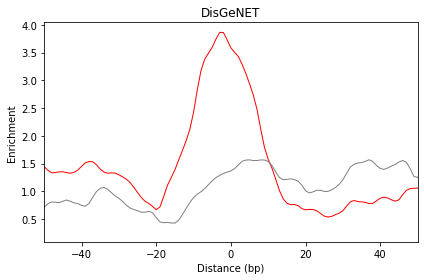

2.0070157626612075

In [6]:
varass = numsumfile_reader("variant_associations.tsv.bed.score.hg38_QPs_coordinates.bed.list.out.num")
ctrl_varass = numsumfile_reader("variant_associations.tsv.bed.score.hg38_QPs_coordinates.bed_control.bed.list.out.num")

var_mean = stats.mean(varass.values())
ctrl_mean = stats.mean(ctrl_varass.values())

var_enrich = [i/var_mean for i in varass.values()]
ctrl_enrich = [i/ctrl_mean for i in ctrl_varass.values()]

varass_smooth = gaussian_filter1d(var_enrich, sigma=1)
ctrl_varass_smooth = gaussian_filter1d(ctrl_enrich, sigma=1)

data=pd.DataFrame({"bins":varass.keys(), "scores":varass_smooth, "type":"QP"})
ctrl_data=pd.DataFrame({"bins":ctrl_varass.keys(), "scores":ctrl_varass_smooth, "type":"Ctrl"})
all_df = pd.DataFrame()
all_df = pd.concat([all_df, data, ctrl_data])

ax = sns.lineplot(x = 'bins', y = 'scores', 
		data=all_df[all_df['type'] == "QP"], 
		linewidth=1,
		alpha=1,
		color="red", errorbar=None)

ax = sns.lineplot(x = 'bins', y = 'scores', 
		data=all_df[all_df['type'] == "Ctrl"], 
		linewidth=1,
		alpha=1,
		color="grey", errorbar=None)
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.title(f"DisGeNET")
xlim = 50
plt.xlim(-xlim, xlim)
plt.tight_layout()
plt.show()

QP_max = all_df[all_df['type'] == "QP"]['scores'].max()
ctrl_max = all_df[all_df['type'] == "Ctrl"]['scores'].max()
QP_max/ctrl_max

# GWAS

2.5499643211776215

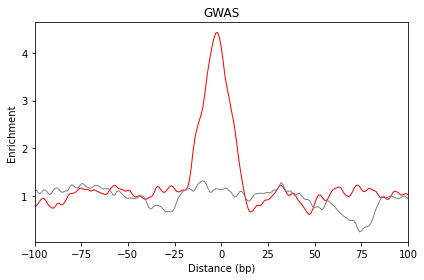

In [9]:
varass = numsumfile_reader("gwas_ebi_associations_v1.bed.score.hg38_QPs_coordinates.bed.list.out.num")
ctrl_varass = numsumfile_reader("gwas_ebi_associations_v1.bed.score.hg38_QPs_coordinates.bed_control.bed.list.out.num")

var_mean = stats.mean(varass.values())
ctrl_mean = stats.mean(ctrl_varass.values())

var_enrich = [i/var_mean for i in varass.values()]
ctrl_enrich = [i/ctrl_mean for i in ctrl_varass.values()]

varass_smooth = gaussian_filter1d(var_enrich, sigma=1)
ctrl_varass_smooth = gaussian_filter1d(ctrl_enrich, sigma=1)

data=pd.DataFrame({"bins":varass.keys(), "scores":varass_smooth, "type":"QP"})
ctrl_data=pd.DataFrame({"bins":ctrl_varass.keys(), "scores":ctrl_varass_smooth, "type":"Ctrl"})
all_df = pd.DataFrame()
all_df = pd.concat([all_df, data, ctrl_data])

ax = sns.lineplot(x = 'bins', y = 'scores', 
		data=all_df[all_df['type'] == "QP"], 
		linewidth=1,
		alpha=1,
		color="red", errorbar=None)

ax = sns.lineplot(x = 'bins', y = 'scores', 
		data=all_df[all_df['type'] == "Ctrl"], 
		linewidth=1,
		alpha=1,
		color="grey", errorbar=None)
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.title(f"GWAS")
xlim = 100
plt.xlim(-xlim, xlim)
plt.tight_layout()

QP_max = all_df[all_df['type'] == "QP"]['scores'].max()
ctrl_max = all_df[all_df['type'] == "Ctrl"]['scores'].max()
QP_max/ctrl_max

# eQTL

In [12]:
tissues = set()
for file in glob.glob("eqtls/*.v8.signif_variant_gene_pairs.txt.score.hg38_QPs_coordinates.bed.list.out.sum"):
    tissue = file.split("/")[1].split(".v8")[0]
    tissues.add(tissue)
print(len(tissues))
tissues

49


{'Adipose_Subcutaneous',
 'Adipose_Visceral_Omentum',
 'Adrenal_Gland',
 'Artery_Aorta',
 'Artery_Coronary',
 'Artery_Tibial',
 'Brain_Amygdala',
 'Brain_Anterior_cingulate_cortex_BA24',
 'Brain_Caudate_basal_ganglia',
 'Brain_Cerebellar_Hemisphere',
 'Brain_Cerebellum',
 'Brain_Cortex',
 'Brain_Frontal_Cortex_BA9',
 'Brain_Hippocampus',
 'Brain_Hypothalamus',
 'Brain_Nucleus_accumbens_basal_ganglia',
 'Brain_Putamen_basal_ganglia',
 'Brain_Spinal_cord_cervical_c-1',
 'Brain_Substantia_nigra',
 'Breast_Mammary_Tissue',
 'Cells_Cultured_fibroblasts',
 'Cells_EBV-transformed_lymphocytes',
 'Colon_Sigmoid',
 'Colon_Transverse',
 'Esophagus_Gastroesophageal_Junction',
 'Esophagus_Mucosa',
 'Esophagus_Muscularis',
 'Heart_Atrial_Appendage',
 'Heart_Left_Ventricle',
 'Kidney_Cortex',
 'Liver',
 'Lung',
 'Minor_Salivary_Gland',
 'Muscle_Skeletal',
 'Nerve_Tibial',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Skin_Not_Sun_Exposed_Suprapubic',
 'Skin_Sun_Exposed_Lower_leg',
 'Small_Intes

In [14]:
all_df = pd.DataFrame()

var_max_enrichment_per_tissue = []

eqtl_wide = pd.DataFrame(index=range(-1000,1000))
ctrl_wide = pd.DataFrame(index=range(-1000,1000))
for t in tissues:
	eqtl = numsumfile_reader(f"eqtls/{t}.v8.signif_variant_gene_pairs.txt.score.hg38_QPs_coordinates.bed.list.out.num")
	ctrl = numsumfile_reader(f"eqtls/{t}.v8.signif_variant_gene_pairs.txt.score.hg38_QPs_coordinates.bed_control.bed.list.out.num")

	var_mean = stats.mean(eqtl.values())
	ctrl_mean = stats.mean(ctrl.values())

	var_enrich = [i/var_mean for i in eqtl.values()]
	ctrl_enrich = [i/ctrl_mean for i in ctrl.values()]

	var_max_enrichment_per_tissue.append(max(var_enrich))

	data=pd.DataFrame({"bins":eqtl.keys(), "scores":var_enrich, "type":"QP", "tissue":t})
	ctrl_data=pd.DataFrame({"bins":ctrl.keys(), "scores":ctrl_enrich, "type":"Ctrl", "tissue":t})

	all_df = pd.concat([all_df, data, ctrl_data])

	eqtl_wide[t] = var_enrich
	ctrl_wide[t] = ctrl_enrich

In [15]:
stats.mean(var_max_enrichment_per_tissue)

4.354018364736781

In [16]:
all_df.head(3)

bins    scores type     tissue
0 -1000  0.948816   QP  Pituitary
1  -999  0.948816   QP  Pituitary
2  -998  0.825057   QP  Pituitary

In [17]:
eqtl_means = eqtl_wide.mean(axis=1)
ctrl_means = ctrl_wide.mean(axis=1)

In [18]:
eqtl_means.max()

4.345424877784754

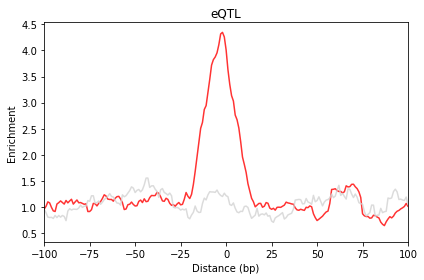

In [19]:
ax = sns.lineplot(data = eqtl_means, alpha=0.8, color='red')
ax = sns.lineplot(data = ctrl_means, alpha=0.8, color='lightgrey')
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.title(f"eQTL")
xlim = 100
plt.xlim(-xlim, xlim)
plt.tight_layout()
plt.show()

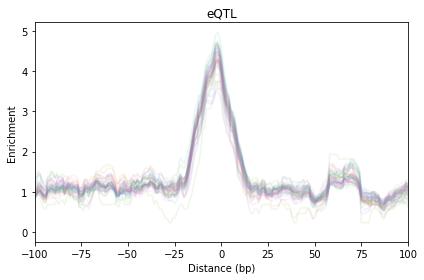

In [20]:
ax = sns.lineplot(data = all_df[all_df['type']=="QP"], x = "bins", y="scores", hue="tissue", alpha=0.1)
plt.title(f"eQTL")
xlim = 100
plt.xlim(-xlim, xlim)
plt.legend().remove()
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.tight_layout()
plt.show()


# multitissue eQTL

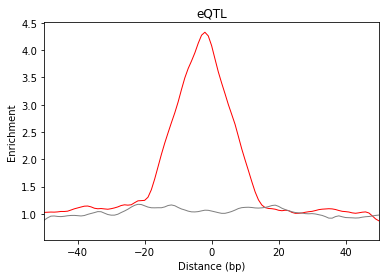

3.4162644644414146

In [22]:
varass = numsumfile_reader("GTEx_Analysis_v8.metasoft.bed.score.hg38_QPs_coordinates.bed.list.out.num")
ctrl_varass = numsumfile_reader("GTEx_Analysis_v8.metasoft.bed.score.hg38_QPs_coordinates.bed_control.bed.list.out.num")

var_mean = stats.mean(varass.values())
ctrl_mean = stats.mean(ctrl_varass.values())

var_enrich = [i/var_mean for i in varass.values()]
ctrl_enrich = [i/ctrl_mean for i in ctrl_varass.values()]

varass_smooth = gaussian_filter1d(var_enrich, sigma=1)
ctrl_varass_smooth = gaussian_filter1d(ctrl_enrich, sigma=1)

data=pd.DataFrame({"bins":varass.keys(), "scores":varass_smooth, "type":"QP"})
ctrl_data=pd.DataFrame({"bins":ctrl_varass.keys(), "scores":ctrl_varass_smooth, "type":"Ctrl"})
all_df = pd.DataFrame()
all_df = pd.concat([all_df, data, ctrl_data])

ax = sns.lineplot(x = 'bins', y = 'scores', 
		data=all_df[all_df['type'] == "QP"], 
		linewidth=1,
		alpha=1,
		color="red", errorbar=None)

ax = sns.lineplot(x = 'bins', y = 'scores', 
		data=all_df[all_df['type'] == "Ctrl"], 
		linewidth=1,
		alpha=1,
		color="grey", errorbar=None)
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.title(f"eQTL")
xlim = 50
plt.xlim(-xlim, xlim)
plt.show()

QP_max = all_df[all_df['type'] == "QP"]['scores'].max()
ctrl_max = all_df[all_df['type'] == "Ctrl"]['scores'].max()
QP_max/ctrl_max

# sQTL

In [23]:
tissues = set()
for file in glob.glob("sqtl/*.v8.sqtl_signifpairs.txt.score.hg38_QPs_coordinates.bed.list.out.num"):
    tissue = file.split("/")[1].split(".v8")[0]
    tissues.add(tissue)
print(len(tissues))

49


In [25]:
all_df = pd.DataFrame()

var_max_enrichment_per_tissue = []

eqtl_wide = pd.DataFrame(index=range(-1000,1000))
ctrl_wide = pd.DataFrame(index=range(-1000,1000))
for t in tissues:
	eqtl = numsumfile_reader(f"sqtl/{t}.v8.sqtl_signifpairs.txt.score.hg38_QPs_coordinates.bed.list.out.num")
	ctrl = numsumfile_reader(f"sqtl/{t}.v8.sqtl_signifpairs.txt.score.hg38_QPs_coordinates.bed_control.bed.list.out.num")

	var_mean = stats.mean(eqtl.values())
	ctrl_mean = stats.mean(ctrl.values())

	var_enrich = [i/var_mean for i in eqtl.values()]
	ctrl_enrich = [i/ctrl_mean for i in ctrl.values()]

	var_max_enrichment_per_tissue.append(max(var_enrich))
	# varass_smooth = gaussian_filter1d(var_enrich, sigma=1)
	# ctrl_varass_smooth = gaussian_filter1d(ctrl_enrich, sigma=1)

	data=pd.DataFrame({"bins":eqtl.keys(), "scores":var_enrich, "type":"QP", "tissue":t})
	ctrl_data=pd.DataFrame({"bins":ctrl.keys(), "scores":ctrl_enrich, "type":"Ctrl", "tissue":t})

	all_df = pd.concat([all_df, data, ctrl_data])

	eqtl_wide[t] = var_enrich
	ctrl_wide[t] = ctrl_enrich

In [26]:
stats.mean(var_max_enrichment_per_tissue)

4.292395407247459

In [27]:
eqtl_means = eqtl_wide.mean(axis=1)
ctrl_means = ctrl_wide.mean(axis=1)

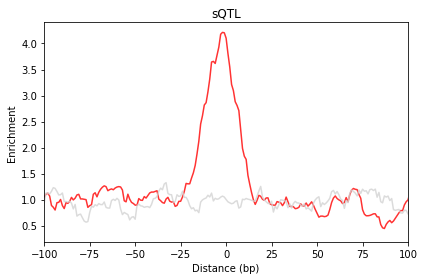

In [28]:
ax = sns.lineplot(data = eqtl_means, alpha=0.8, color='red')
ax = sns.lineplot(data = ctrl_means, alpha=0.8, color='lightgrey')
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.title(f"sQTL")
xlim = 100
plt.xlim(-xlim, xlim)
plt.tight_layout()

# methylation

In [30]:
tissues = set()
for file in glob.glob("methylation_nums/*.regular.perm.fdr.txt.bed.score.hg38_QPs_coordinates.bed.list.out.num"):
    tissue = file.split("/")[1].split(".regular")[0]
    tissues.add(tissue)
print(len(tissues))

9


In [31]:
all_df = pd.DataFrame()

var_max_enrichment_per_tissue = []

eqtl_wide = pd.DataFrame(index=range(-1000,1000))
ctrl_wide = pd.DataFrame(index=range(-1000,1000))
for t in tissues:
	eqtl = numsumfile_reader(f"methylation/{t}.regular.perm.fdr.txt.bed.score.hg38_QPs_coordinates.bed.list.out.num")
	ctrl = numsumfile_reader(f"methylation/{t}.regular.perm.fdr.txt.bed.score.hg38_QPs_coordinates.bed_control.bed.list.out.num")

	var_mean = stats.mean(eqtl.values())
	ctrl_mean = stats.mean(ctrl.values())

	var_enrich = [i/var_mean for i in eqtl.values()]
	ctrl_enrich = [i/ctrl_mean for i in ctrl.values()]

	var_max_enrichment_per_tissue.append(max(var_enrich))
	# varass_smooth = gaussian_filter1d(var_enrich, sigma=1)
	# ctrl_varass_smooth = gaussian_filter1d(ctrl_enrich, sigma=1)

	data=pd.DataFrame({"bins":eqtl.keys(), "scores":var_enrich, "type":"QP", "tissue":t})
	ctrl_data=pd.DataFrame({"bins":ctrl.keys(), "scores":ctrl_enrich, "type":"Ctrl", "tissue":t})

	all_df = pd.concat([all_df, data, ctrl_data])

	eqtl_wide[t] = var_enrich
	ctrl_wide[t] = ctrl_enrich

In [32]:
stats.mean(var_max_enrichment_per_tissue)

4.21825838805314

In [33]:
eqtl_means = eqtl_wide.mean(axis=1)
ctrl_means = ctrl_wide.mean(axis=1)

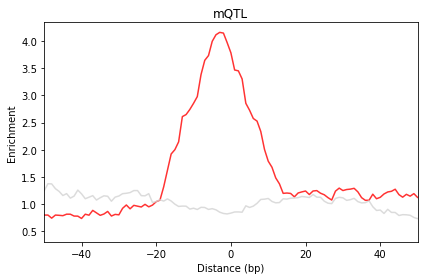

In [34]:
ax = sns.lineplot(data = eqtl_means, alpha=0.8, color='red')
ax = sns.lineplot(data = ctrl_means, alpha=0.8, color='lightgrey')
ax.set(xlabel='Distance (bp)', ylabel='Enrichment')
plt.title(f"mQTL")
xlim = 50
plt.xlim(-xlim, xlim)
plt.tight_layout()